1.Khai báo thư viện


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tabulate import tabulate
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


2.Đọc dữ liệu 

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/content/datasetnhom15.xlsx',sheet_name='Sheet1')
df.head()


,STT,HoTen,GioiTinh,Tuoi,BC_Ngoai_Pham,Tien_An,Dong_Co,BC_Pham_Toi
0,1.0,Huỳnh Thị Trúc Ly,Nữ,Trên 50,Có,Không,Có,Không Có
1,2.0,Vũ Hoàng Yến,Nữ,Từ 18-50,Không,Có,Có,Không Có
2,3.0,Nguyễn Thị Thanh Kiều,Nữ,Từ 18-50,Không Chắc,Có,Có,Không Rõ Ràng
3,4.0,Lê Hoa,Nữ,Trên 50,Có,Có,Không,Không Có
4,5.0,Nguyễn Tiến Hải,Nam,Từ 18-50,Không,Không,Không,Không Rõ Ràng


3. Mô tả dữ liệu 

In [ ]:
# Xem 5 dòng dữ liệu cuối cùng

df.tail()

,STT,HoTen,GioiTinh,Tuoi,BC_Ngoai_Pham,Tien_An,Dong_Co,BC_Pham_Toi
560,561.0,Nguyễn Quang Việt,Nam,Trên 50,Có,Không,Không,Không Rõ Ràng
561,562.0,Trương Đinh Tuấn,Nam,Trên 50,Không Chắc,Không,Không,Đáng Tin Cậy
562,563.0,TRẦN XUÂN THỊNH,Nam,Từ 18-50,Không Chắc,Không,Không,Đáng Tin Cậy
563,564.0,Trần Thị Thu,Nữ,Trên 50,Không,Có,Không,Không Rõ Ràng
564,565.0,Tô Văn Thuận,Nam,Từ 18-50,Không,Không,Có,Không Có


In [ ]:
# Số lượng mẫu và số thuộc tính
print(df.shape)
# Số lượng mẫu
print(df.shape[0])
# số lượng thuộc tính
print(df.shape[1])

(565, 8)
565
8


In [ ]:
# Thống kê các giá trị định lượng
df.describe()

,STT
count,565.000000
mean,283.000000
std,163.245725
min,1.000000
25%,142.000000
50%,283.000000
75%,424.000000
max,565.000000


In [ ]:
# Hiển thị kiểu dữ liệu của các thuộc tính
df.dtypes

STT              float64
HoTen             object
GioiTinh          object
Tuoi              object
BC_Ngoai_Pham     object
Tien_An           object
Dong_Co           object
BC_Pham_Toi       object
dtype: object

In [ ]:
# Các giá trị thống kê
df.isnull().sum()

STT              0
HoTen            0
GioiTinh         0
Tuoi             0
BC_Ngoai_Pham    0
Tien_An          1
Dong_Co          0
BC_Pham_Toi      0
dtype: int64

4. Tiền xử lý dữ liệu 

In [ ]:
# Đổi dữ liệu từ dạng định danh (object) về dạng số
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["HoTen"] = lb_make.fit_transform(df["HoTen"])
df["GioiTinh"] = lb_make.fit_transform(df["GioiTinh"])
df["Tuoi"] = lb_make.fit_transform(df["Tuoi"])
df["BC_Ngoai_Pham"] = lb_make.fit_transform(df["BC_Ngoai_Pham"])
df["Tien_An"] = lb_make.fit_transform(df["Tien_An"])
df["Dong_Co"] = lb_make.fit_transform(df["Dong_Co"])
df["BC_Pham_Toi"] = lb_make.fit_transform(df["BC_Pham_Toi"])
df.head(10)

,STT,HoTen,GioiTinh,Tuoi,BC_Ngoai_Pham,Tien_An,Dong_Co,BC_Pham_Toi
0,1.0,60,2,5,0,1,0,0
1,2.0,486,2,6,1,0,0,0
2,3.0,247,2,6,2,0,0,3
3,4.0,85,2,5,0,0,1,0
4,5.0,271,1,6,1,1,1,3
5,6.0,34,2,5,0,1,1,3
6,7.0,249,2,5,1,0,1,4
7,8.0,307,1,6,1,1,0,4
8,9.0,303,1,5,2,0,0,4
9,10.0,50,2,6,0,1,1,4


5. Xây dựng mô hình dữ đoán khả năng phạm tội 

5.1. Xây dựng tập dữ liệu huấn luyện(train), và tập dữ liệu kiểm thử (test)

In [ ]:
# Xác định thuộc tính mô tả X và thuộc tính dự đoán y
features = ['Tuoi','GioiTinh','HoTen','BC_Ngoai_Pham','Tien_An','Dong_Co']
target = ['BC_Pham_Toi']
X = df[features]
y = df[target]
print(X)
print(y)

     Tuoi  GioiTinh  HoTen  BC_Ngoai_Pham  Tien_An  Dong_Co
0       5         2     60              0        1        0
1       6         2    486              1        0        0
2       6         2    247              2        0        0
3       5         2     85              0        0        1
4       6         1    271              1        1        1
..    ...       ...    ...            ...      ...      ...
560     5         1    186              0        1        1
561     5         1    386              2        1        1
562     6         1    371              2        1        1
563     5         2    426              1        0        1
564     6         1    452              1        1        0

[565 rows x 6 columns]
     BC_Pham_Toi
0              0
1              0
2              3
3              0
4              3
..           ...
560            3
561            4
562            4
563            3
564            0

[565 rows x 1 columns]


In [ ]:
# Chia bộ dữ liệu thành hai tập train và test theo tỉ lệ 70% train,30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     Tuoi  GioiTinh  HoTen  BC_Ngoai_Pham  Tien_An  Dong_Co
13      5         2    417              1        1        0
149     6         2    478              1        1        0
495     6         1     91              1        1        1
283     5         2    372              1        0        1
506     3         1    137              0        1        1
..    ...       ...    ...            ...      ...      ...
378     6         2    479              1        1        1
71      1         2    237              0        1        1
74      6         2    503              2        1        1
379     6         1    454              1        1        1
29      5         1    438              2        1        1

[378 rows x 6 columns]
     BC_Pham_Toi
13             0
149            1
495            4
283            4
506            4
..           ...
378            1
71             4
74             4
379            4
29             4

[378 rows x 1 columns]
     Tuoi  GioiTinh  HoTen  

5.2. Xây dựng mô hình họchọc

5.2.1. Cây quyết định Decision Tree

In [ ]:
# Khai báo mô hình cây quyết định
model=tree.DecisionTreeClassifier(criterion = "entropy",
random_state = 100,
max_depth = 3,
min_samples_leaf = 5)

In [ ]:
# Thực thi mô hình
model = model.fit(X_train,y_train)

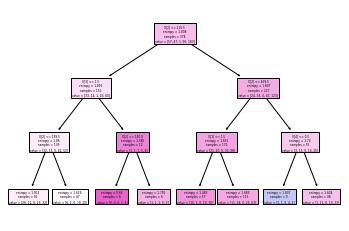

In [ ]:
tree.plot_tree(model, filled = True);

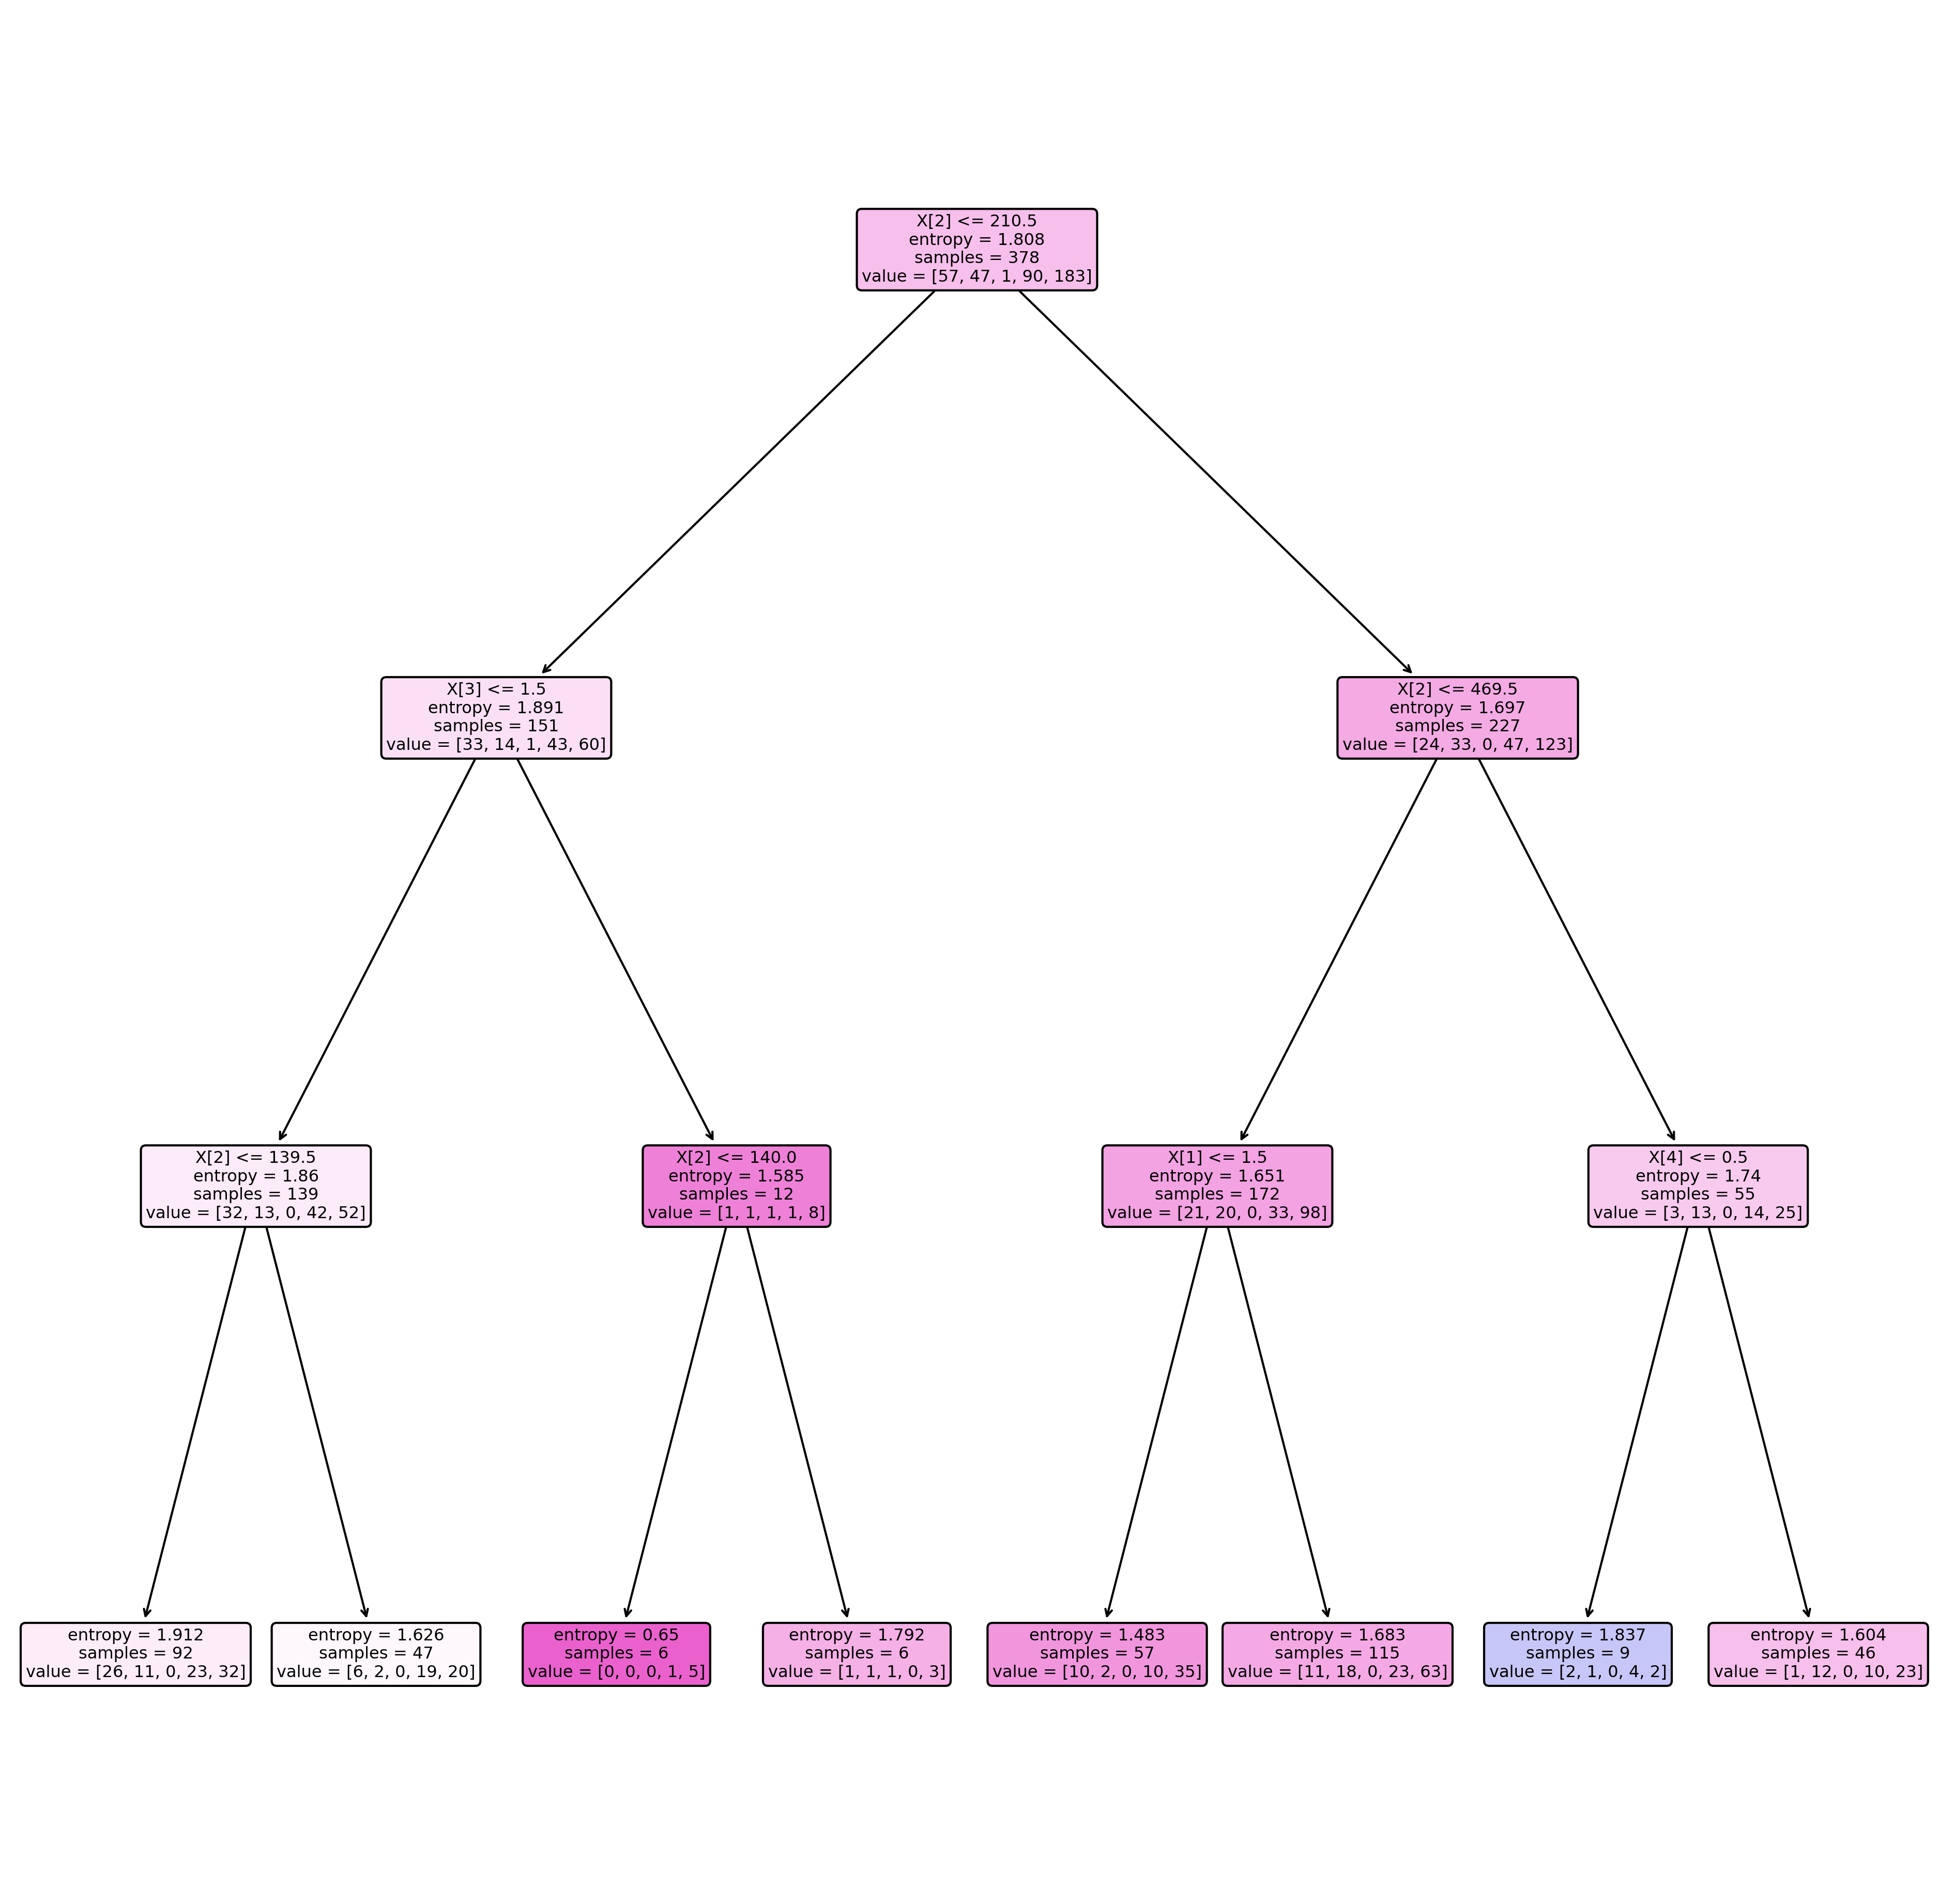

In [ ]:
#Lưu lại cây quyết định với hình ảnh mong muốn
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=300)
_=tree.plot_tree(model,filled=True,rounded=True, ax=axes)
plt.savefig('decision_tree.png')

5.2.2. Cây quyết định Random Forest 

In [ ]:
# Lựa chọn kỹ thuật học Random Forest (thêm các tham số nếu cần can thiệp sâu hơn)
modelRandomForest = RandomForestClassifier()

# Đưa dữ liệu vào huấn luyện mô hình
modelRandomForest.fit(X_train.values, y_train.values.ravel())

RandomForestClassifier()

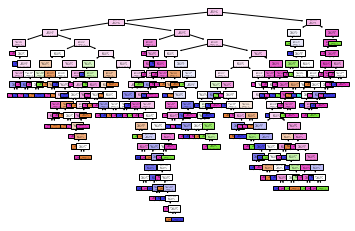

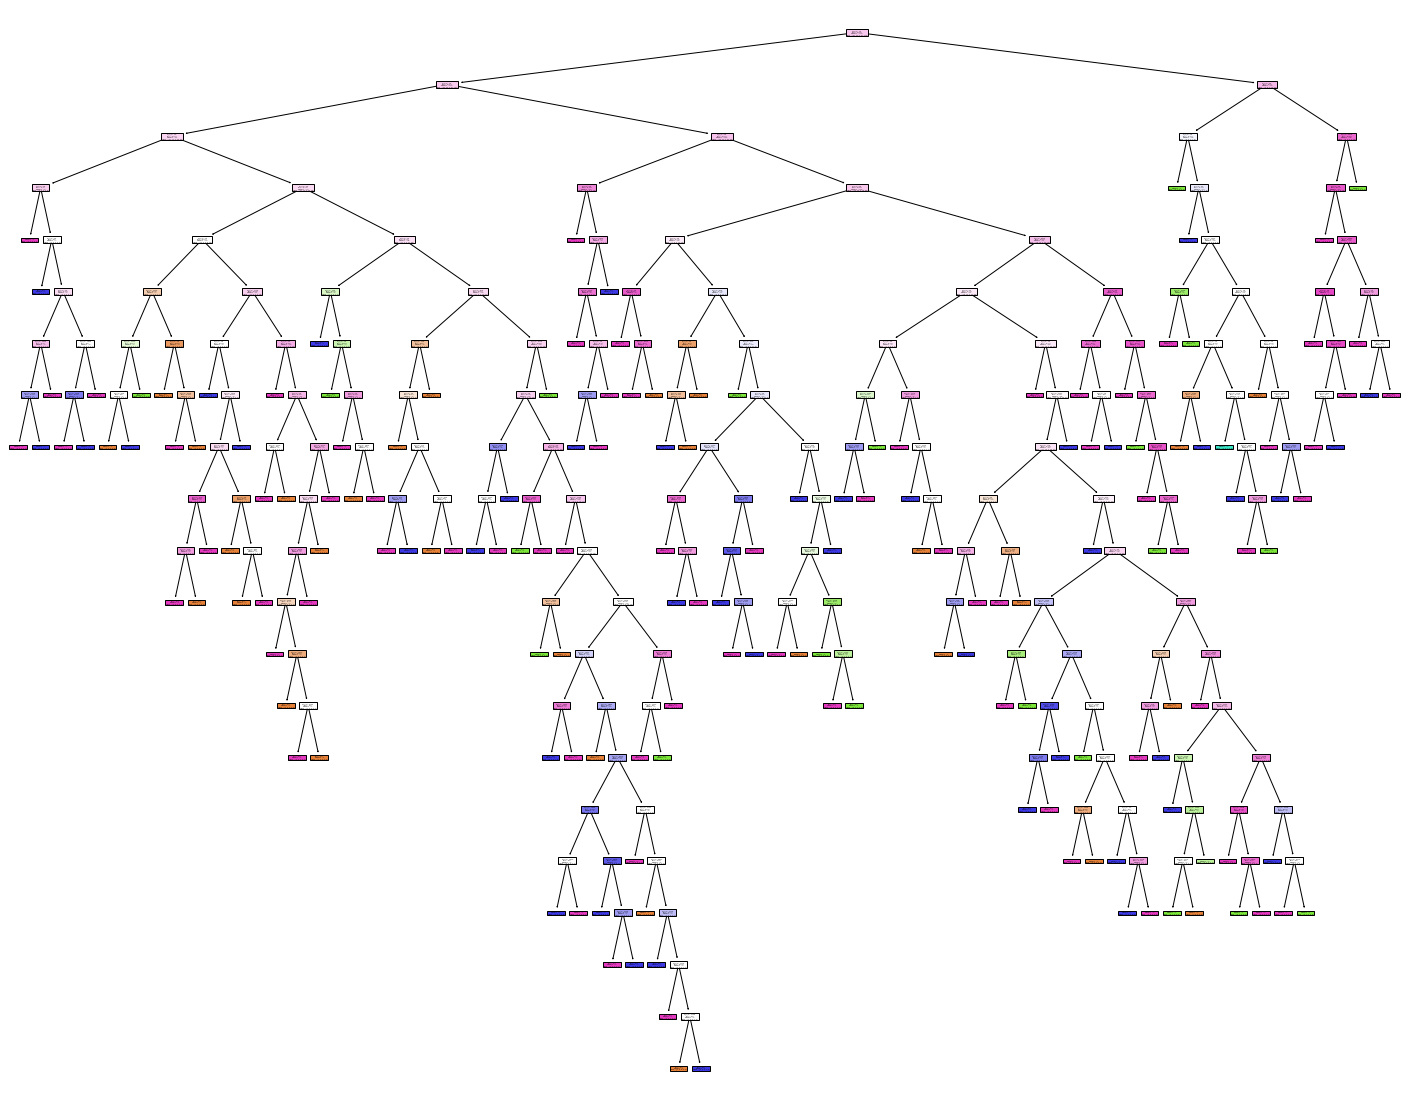

In [ ]:
# Hiển thị mô hình: ví dụ một cây trong rừng ngẫu nhiên
estimator = modelRandomForest.estimators_[1] # cây thứ 2 của rừng
plot_tree(estimator, filled = True)
plt.show()

# Lưu lại cây dưới dạng ảnh nếu muốn
figRandomForest = plt.figure(figsize = (25,20))
_= plot_tree(estimator, filled = True)
figRandomForest.savefig("random_Forest.png")

6. Kiểm tra mô hình và đánh giá độ chính xác của mô hình 

In [ ]:
# Kiểm thử mô hình trên tập test
y_pred_array = []
for i in range(1000):
  y_pred_array.append(model.predict(X_test.values)) 
y_pred = sum(y_pred_array) / len(y_pred_array)
print ("Độ chính xác khi sử dụng decision tree (Trung bình):", accuracy_score(y_test, y_pred) * 100)

# Kiểm thử mô hình trên tập test
y_pred_RandomForest_array = []
for i in range(1000):
  y_pred_RandomForest_array.append(modelRandomForest.predict(X_test.values)) 
y_pred_RandomForest = sum(y_pred_RandomForest_array) / len(y_pred_RandomForest_array)
print ("Độ chính xác khi sử dụng Random Forest (Trung bình):", accuracy_score(y_test, y_pred_RandomForest) * 100)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

Độ chính xác khi sử dụng decision tree (Trung bình): 42.780748663101605
Độ chính xác khi sử dụng Random Forest (Trung bình): 31.016042780748666


6.1. Decision Tree

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


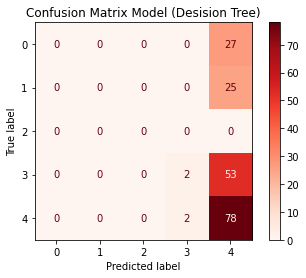

In [ ]:
#Xây dựng ma trận nhầm lẫn (Confusion Matrix)
predictions = model.predict(X_test.values)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix Model (Desision Tree)')
plt.show()

In [ ]:
#Decision Tree
reprot = classification_report(y_test, y_pred)
print(reprot)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        25
           3       0.50      0.04      0.07        55
           4       0.43      0.97      0.59        80

    accuracy                           0.43       187
   macro avg       0.23      0.25      0.17       187
weighted avg       0.33      0.43      0.27       187



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6.2. Random Forest

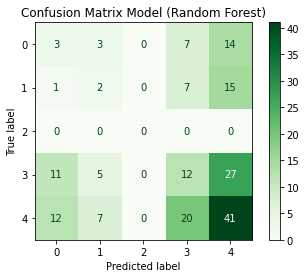

In [ ]:
#Xây dựng ma trận nhầm lẫn (Confusion Matrix)

predictionsRandomForest = modelRandomForest.predict(X_test.values)
cm = confusion_matrix(y_test, predictionsRandomForest, labels=modelRandomForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=modelRandomForest.classes_)
disp.plot(cmap=plt.cm.Greens)
disp.ax_.set_title('Confusion Matrix Model (Random Forest)')
plt.show()

In [ ]:
#Random Forest
reprotRandomForest = classification_report(y_test, y_pred_RandomForest)
print(reprotRandomForest)

              precision    recall  f1-score   support

           0       0.11      0.11      0.11        27
           1       0.12      0.08      0.10        25
           3       0.26      0.22      0.24        55
           4       0.42      0.51      0.46        80

    accuracy                           0.31       187
   macro avg       0.23      0.23      0.23       187
weighted avg       0.29      0.31      0.30       187



In [ ]:
#Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tnRF, fpRF, fnRF, tpRF = confusion_matrix(y_test, y_pred_RandomForest).ravel()
data = [['Decision Tree', tn, fp, fn, tp], ['Random Forest', tnRF, fpRF, fnRF, tpRF]]
col_names = ['Model', 'TN', 'FP', 'FN', 'TP']
print(tabulate(data, headers=col_names))

ValueError: ignored

7.Sử dụng mô hình

7.1. Mô hình dự đoán sử dụng Decision True



In [ ]:
# Sử dụng mô hình dự đoán khả năng phạm tội phục vụ công tác khoanh vùng nghi phạm 
# Trình độ 1, Độ tuổi 1, ID_KH 18, Loại GV 1, Tháng bắt đầu học 10, Ngày học 1, Làm bài tập về nhà 1, Phản hồi chăm sóc 2, Đánh giá của CVHT 2, Đánh giá về GV 2
new_nghipham = [[60,2,5,0,1,0,0]]
predicted_label = model.predict(new_nghipham)
if predicted_label == 0:
    print("Nghi phạm có khả năng phạm tội (Desision tree)")
else:
    print("Nghi phạm không có khả năng phạm tội (Desision tree)")

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored

7.2. Sử dụng mô hình Random Forest

In [ ]:
# Kiểm thử mô hình

y_pred = model.predict(X_test)
print("Giá trị nhãn mô hình dự đoán được:\n " ,y_pred)

Giá trị nhãn mô hình dự đoán được:
  [4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4
 4 4]


In [ ]:
# Xác định ma trần nhầm lẫn

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[ 0  0  0 27]
 [ 0  0  0 25]
 [ 0  0  2 53]
 [ 0  0  2 78]]


In [ ]:
# Độ chính xác của mô hình

print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  42.780748663101605


Bước 6: Sử dụng mô hình